In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
X,Y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60,random_state=42)

In [12]:
df = pd.DataFrame(X, columns=['Feature_1','Feauture_2'])
df.head()

,Feature_1,Feauture_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [14]:
inertia = []
K_range = range(1,11)

In [15]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [16]:
inertia

[1000.0000000000006,
 297.8954141051723,
 11.575484723104985,
 9.752067977356848,
 8.257175272446279,
 6.917577320416797,
 6.334755391595288,
 5.704177177901426,
 5.060234133532074,
 4.7623618981303935]

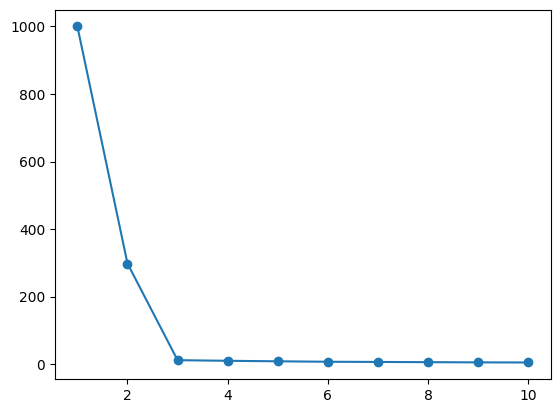

In [17]:
plt.plot(K_range,inertia,marker = 'o')

In [18]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [19]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [22]:
df['cluster']=cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feauture_2'>

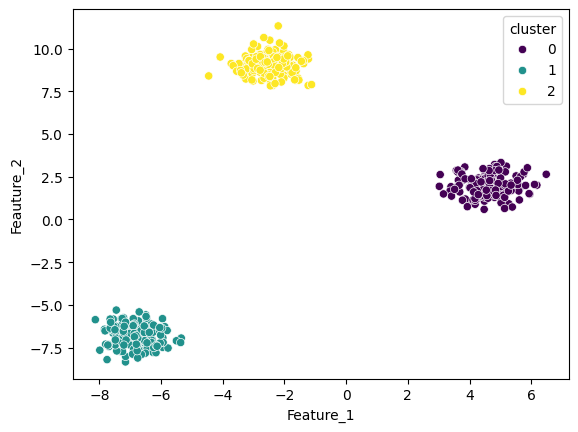

In [23]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feauture_2'],
                hue=df['cluster'],
                palette='viridis')


**DB Scan**

In [25]:
from sklearn.datasets import make_moons

In [26]:
X,Y_true = make_moons(n_samples=500, noise=0.05, random_state=42)


In [27]:
from sklearn.cluster import KMeans,DBSCAN

In [28]:
df = pd.DataFrame(X, columns=['Feature_1','Feauture_2'])

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [30]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [31]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feauture_2'>

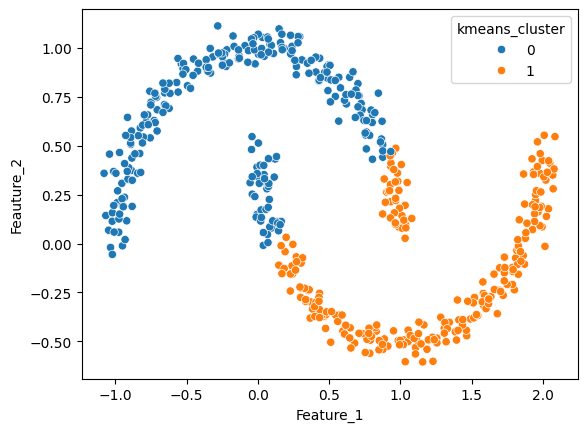

In [32]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feauture_2'],
                hue=df['kmeans_cluster'],
                palette='tab10')


In [33]:
dbscan = DBSCAN(eps=0.3,min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [34]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feauture_2'>

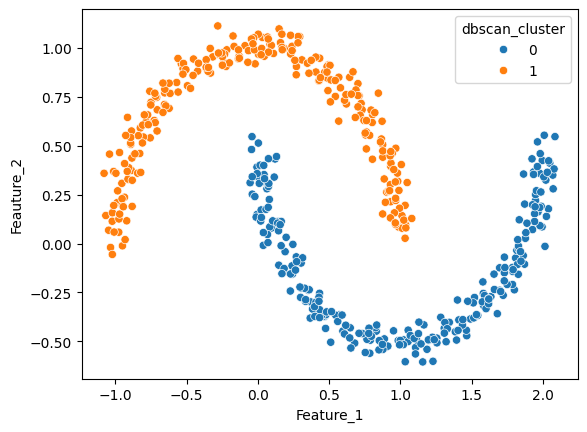

In [36]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feauture_2'],
                hue = df['dbscan_cluster'],
                palette = 'tab10')